# Activation functions

Compariing the learning speed and efficiency of the network depending on the number of neurons in each layer, network depth and the type of activation function. 



In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import miowad.nn as nn
from miowad.data import RegressionDataset, ClassificationDataset
from miowad.data import MinMaxScaler, StandardScaler, OneHotEncoder
from miowad.nn.viz import visualize_nn
from miowad.utils import set_seed

set_seed(123)

In [3]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_classification(model, X_train, y_train, X_test, y_test, softmax=True):

    preds_train = model.forward(X_train)
    preds_test = model.forward(X_test)

    if softmax:
        preds_train = nn.softmax(preds_train)
        preds_test = nn.softmax(preds_test)

    preds_train = preds_train.argmax(axis=1)
    preds_test = preds_test.argmax(axis=1)

    print("Training accuracy: {:.2f}".format(accuracy_score(y_train, preds_train)))
    print("Test accuracy: {:.2f}".format(accuracy_score(y_test, preds_test,)))
    print("-"*10)
    print("Training F1-score: {:.2f}".format(f1_score(y_train, preds_train, average='macro')))
    print("Test F1-score: {:.2f}".format(f1_score(y_test, preds_test, average='macro')))

In [4]:
from miowad.metrics import mean_squared_error

def evaluate_regression(model, X_train, y_train, X_test, y_test, X_scaler, y_scaler):

    preds_train = model.forward(X_train)
    preds_test = model.forward(X_test)

    # unnormalize predictions
    if y_scaler is not None:
        preds_train = y_scaler.inverse_transform(preds_train)
        preds_test = y_scaler.inverse_transform(preds_test)

    # unnormalize data
    if X_scaler is not None and y_scaler is not None:
        X_train = X_scaler.inverse_transform(X_train)
        X_test = X_scaler.inverse_transform(X_test)
        y_train = y_scaler.inverse_transform(y_train)
        y_test = y_scaler.inverse_transform(y_test)

    print("Training MSE: {:.2f}".format(mean_squared_error(y_train, preds_train)))
    print("Test MSE: {:.2f}".format(mean_squared_error(y_test, preds_test)))
    print("-"*10)

In [5]:
 from miowad.metrics import mean_squared_error

 def plot_preds_regression(model, X_train, y_train, X_test, y_test, X_scaler, y_scaler):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

    preds_train = model.forward(X_train)
    preds_test = model.forward(X_test)

    # unnormalize predictions
    if y_scaler is not None:
        preds_train = y_scaler.inverse_transform(preds_train)
        preds_test = y_scaler.inverse_transform(preds_test)

    # unnormalize data
    if X_scaler is not None and y_scaler is not None:
        X_train = X_scaler.inverse_transform(X_train)
        X_test = X_scaler.inverse_transform(X_test)
        y_train = y_scaler.inverse_transform(y_train)
        y_test = y_scaler.inverse_transform(y_test)


    mse_train = mean_squared_error(y_train, preds_train)
    mse_test = mean_squared_error(y_test, preds_test)

    ax1.scatter(X_train, y_train, label='ground truth')
    ax1.scatter(X_train, preds_train, label='preds')
    ax1.set_title(f"Train MSE: {mse_train:.2f}")
    ax1.legend()

    ax2.scatter(X_test, y_test, label='ground truth')
    ax2.scatter(X_test, preds_test, label='preds')
    ax2.set_title(f"Test MSE: {mse_test:.2f}")
    ax2.legend()

## multimodal-large

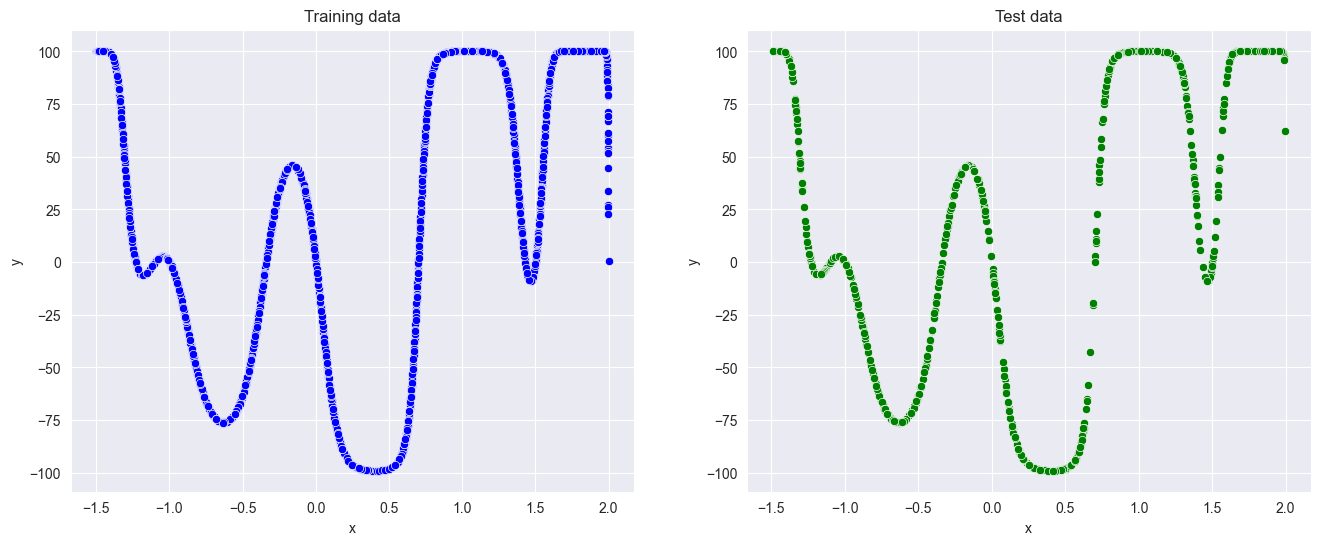

In [6]:
multimodal_large = RegressionDataset('multimodal-large')
multimodal_large.plot_dataset()

In [7]:
multimodal_large_train, multimodal_large_test = multimodal_large.to_df()

X_train, y_train = multimodal_large_train['x'].values.reshape(-1, 1), multimodal_large_train['y'].values.reshape(-1, 1)
X_test, y_test = multimodal_large_test['x'].values.reshape(-1, 1), multimodal_large_test['y'].values.reshape(-1, 1)

# let's scale the data for easier training
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### Linear

#### 1 hidden layer

In [8]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [9]:
optimizer = nn.optimizers.Adam(model.parameters, lr=5e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

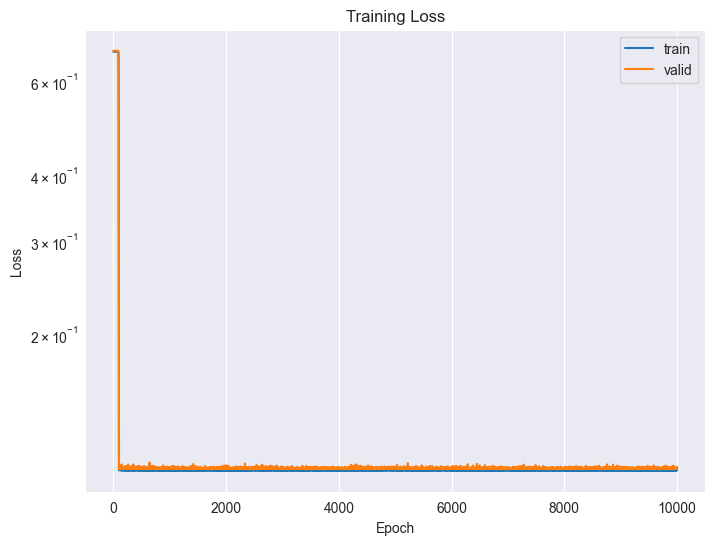

In [11]:
trainer.plot_training(ylog=True)

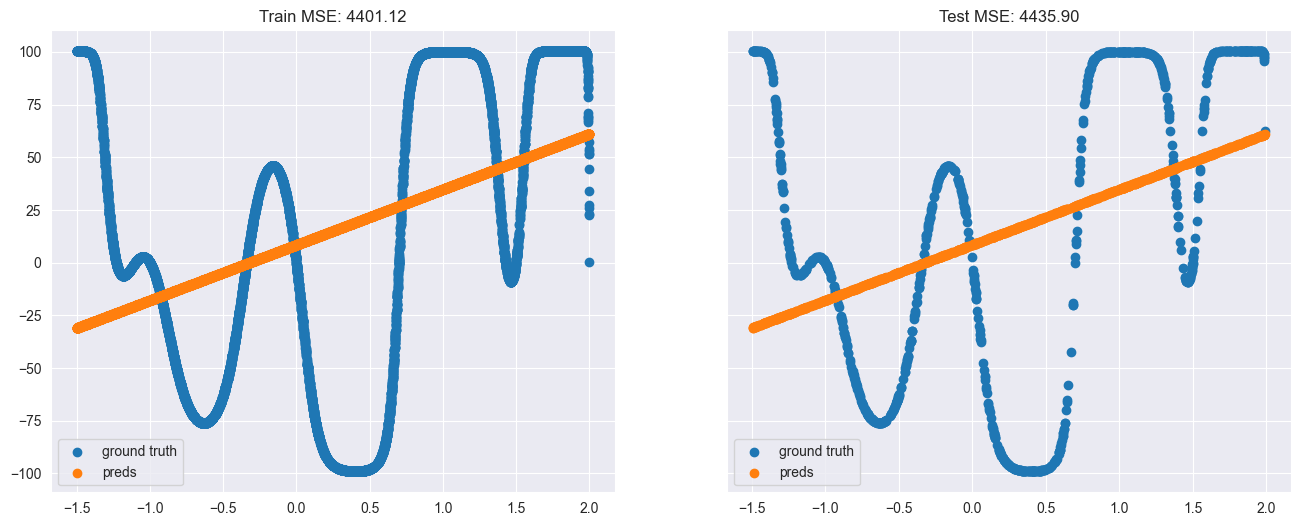

In [12]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [14]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 4401.12
Test MSE: 4435.90
----------


#### 2 hidden layers

In [42]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Linear(10, 10),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [43]:
optimizer = nn.optimizers.Adam(model.parameters, lr=5e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

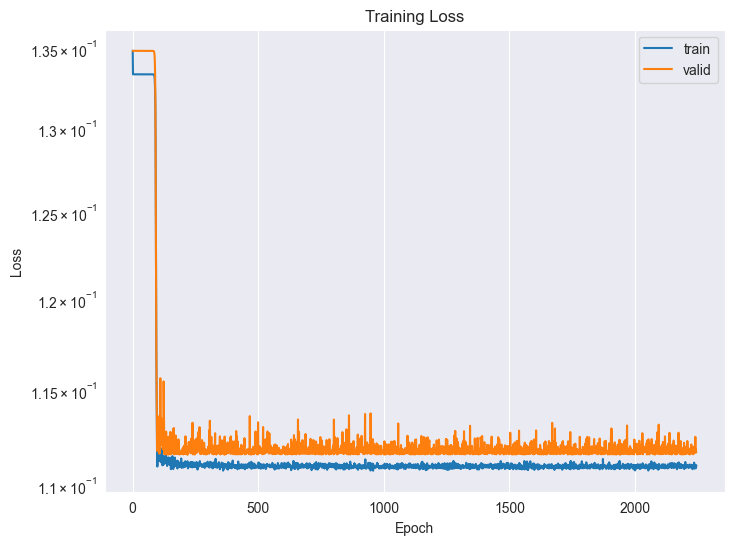

In [45]:
trainer.plot_training(ylog=True)

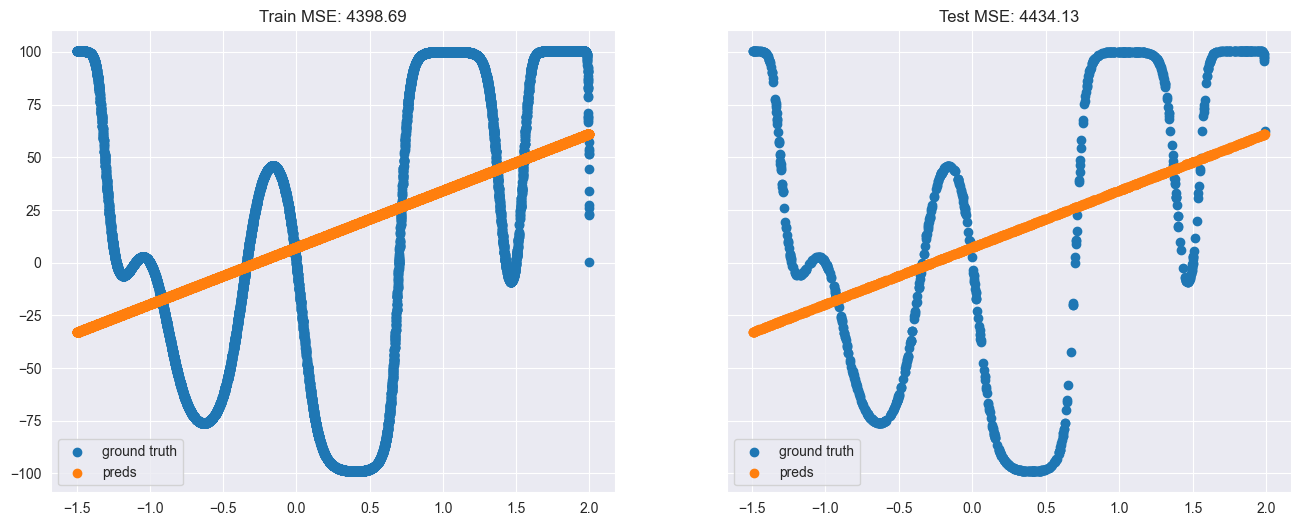

In [46]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [47]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 4398.69
Test MSE: 4434.13
----------


#### 3 hidden layers

In [8]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Linear(10, 10),
    nn.Linear(10, 10),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [9]:
optimizer = nn.optimizers.SGD(model.parameters, lr=0.1, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

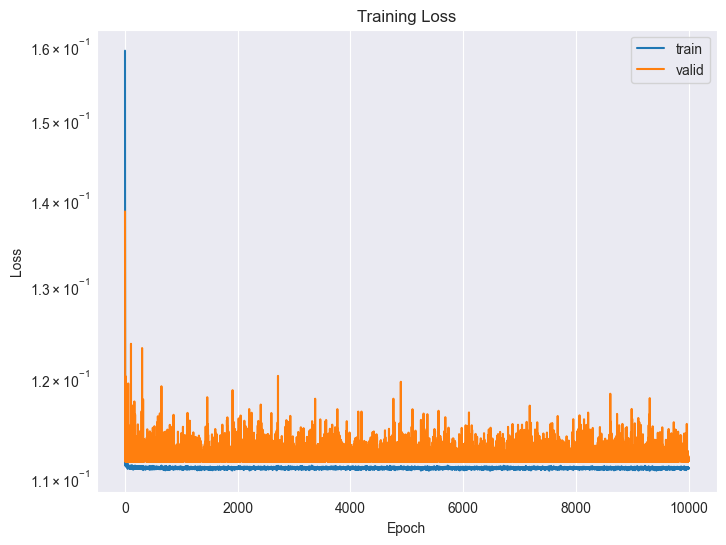

In [11]:
trainer.plot_training(ylog=True)

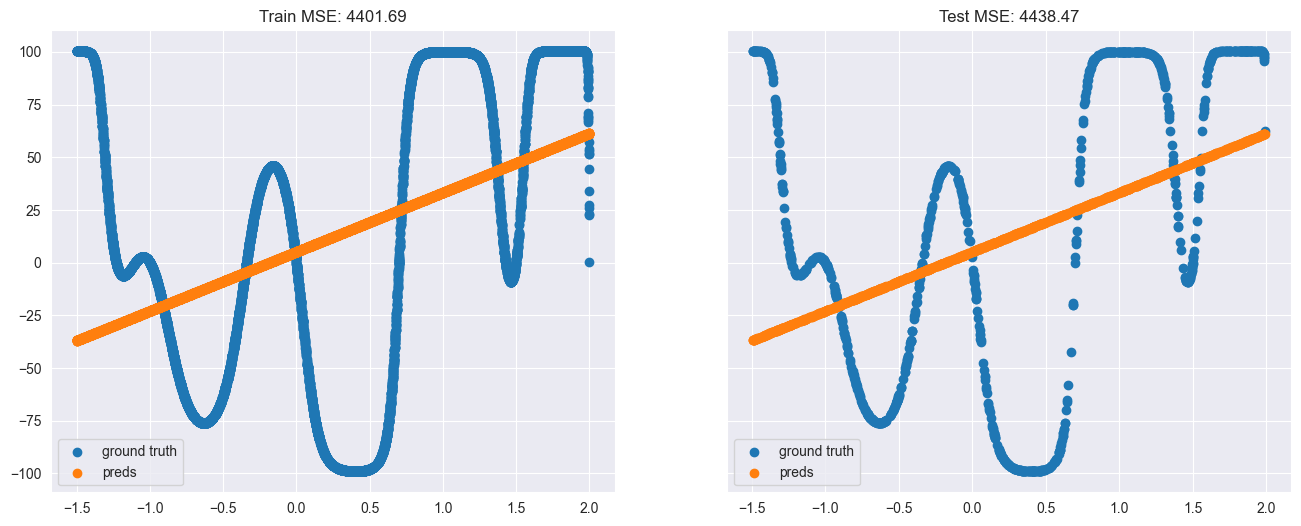

In [14]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [13]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 4401.69
Test MSE: 4438.47
----------


### Sigmoid

#### 1 hidden layer

In [98]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [99]:
optimizer = nn.optimizers.Adam(model.parameters, lr=5e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

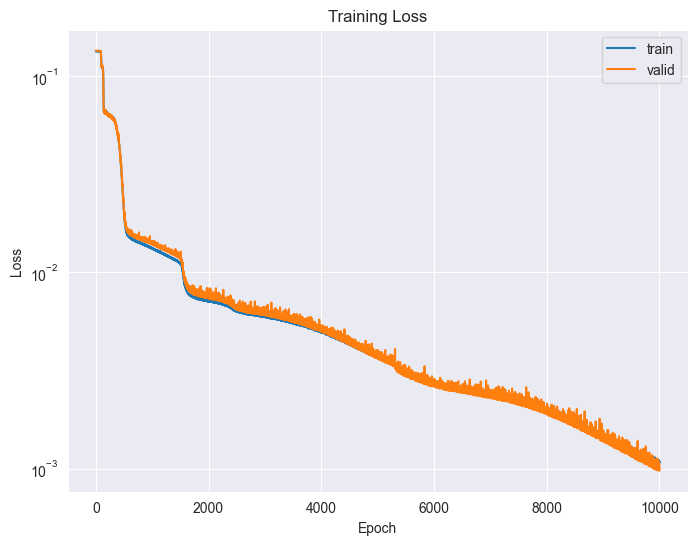

In [101]:
trainer.plot_training(ylog=True)

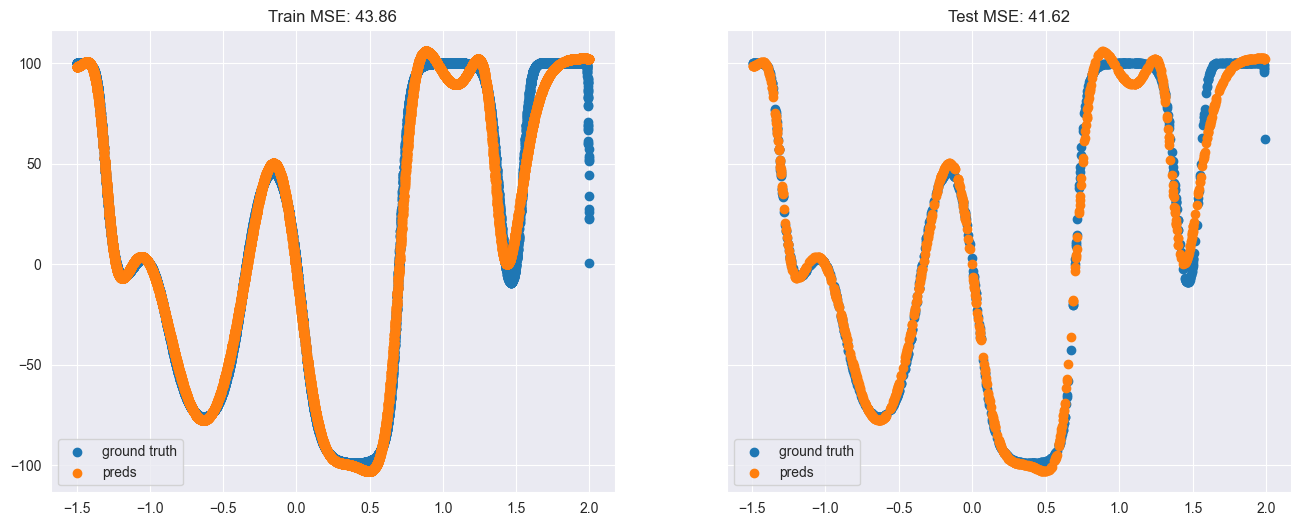

In [102]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [103]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 43.86
Test MSE: 41.62
----------


#### 2 hidden layers

In [15]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
    nn.Sigmoid(),
])
model.init_weights('xavier_uniform')

In [16]:
optimizer = nn.optimizers.Adam(model.parameters, lr=5e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

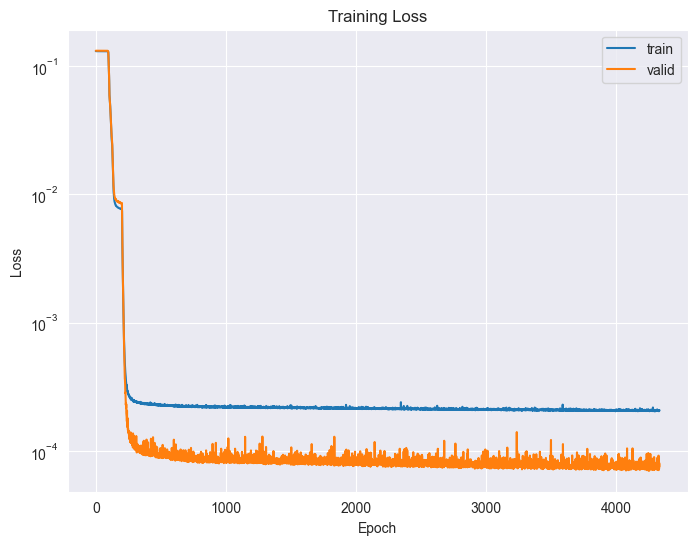

In [18]:
trainer.plot_training(ylog=True)

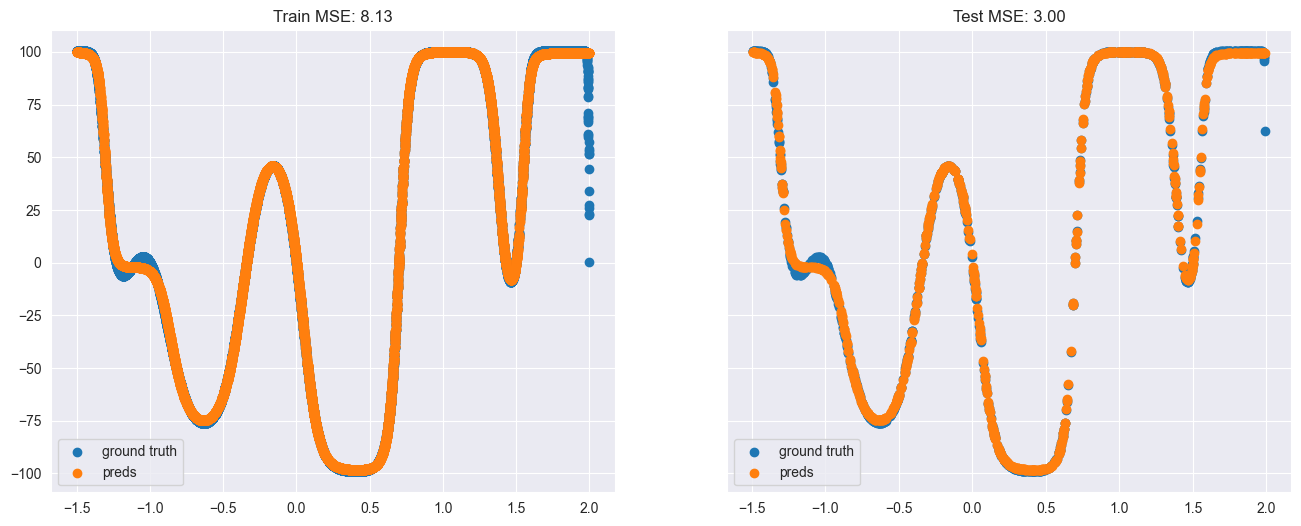

In [19]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [21]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 8.13
Test MSE: 3.00
----------


#### 3 hidden layers

In [53]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [54]:
optimizer = nn.optimizers.Adam(model.parameters, lr=1e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

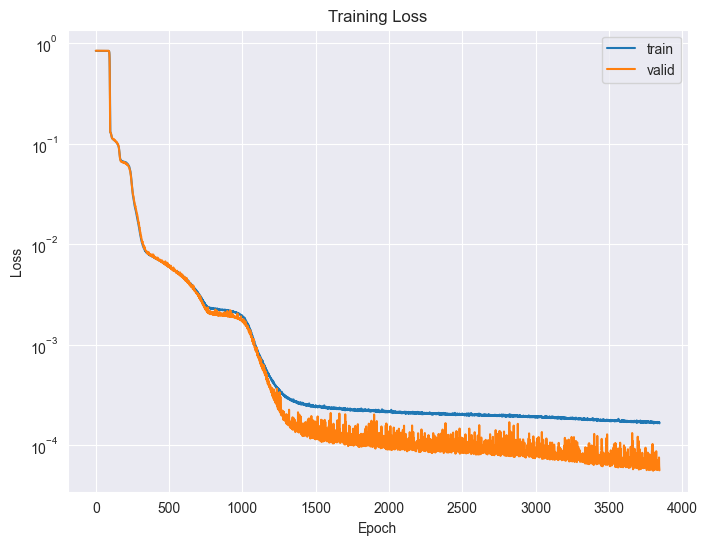

In [56]:
trainer.plot_training(ylog=True)

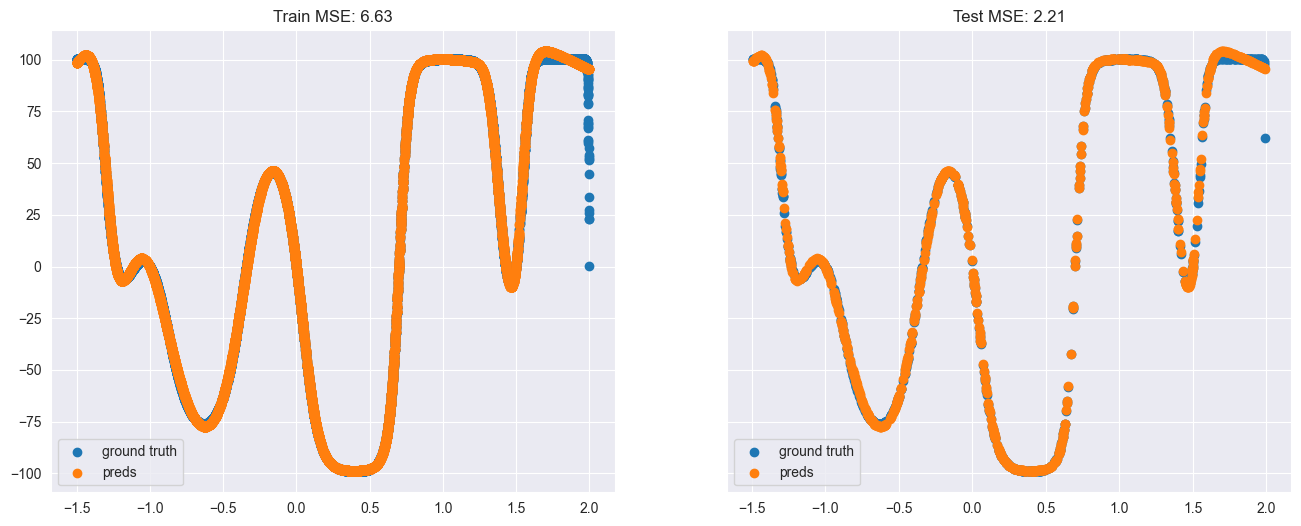

In [57]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [58]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 6.63
Test MSE: 2.21
----------


### Tanh

#### 1 hidden layer

In [104]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [105]:
optimizer = nn.optimizers.Adam(model.parameters, lr=5e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

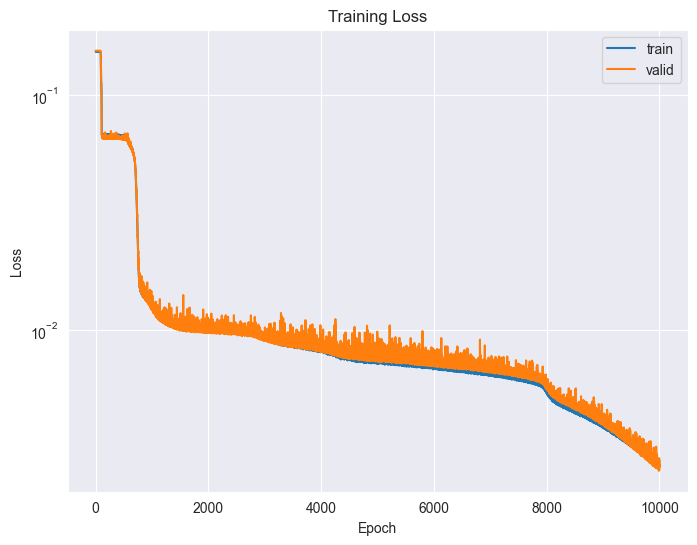

In [107]:
trainer.plot_training(ylog=True)

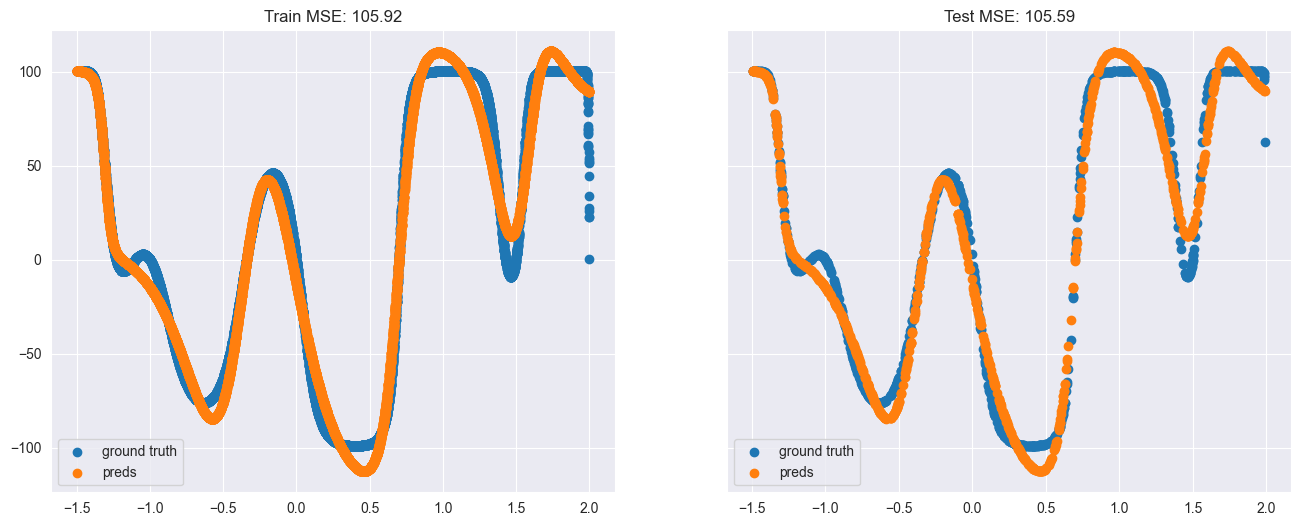

In [108]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [110]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 105.92
Test MSE: 105.59
----------


#### 2 hidden layers

In [22]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [23]:
optimizer = nn.optimizers.Adam(model.parameters, lr=5e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

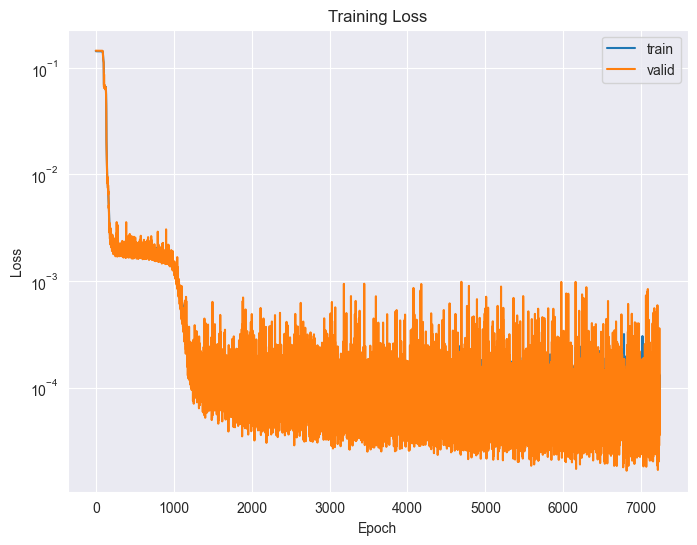

In [25]:
trainer.plot_training(ylog=True)

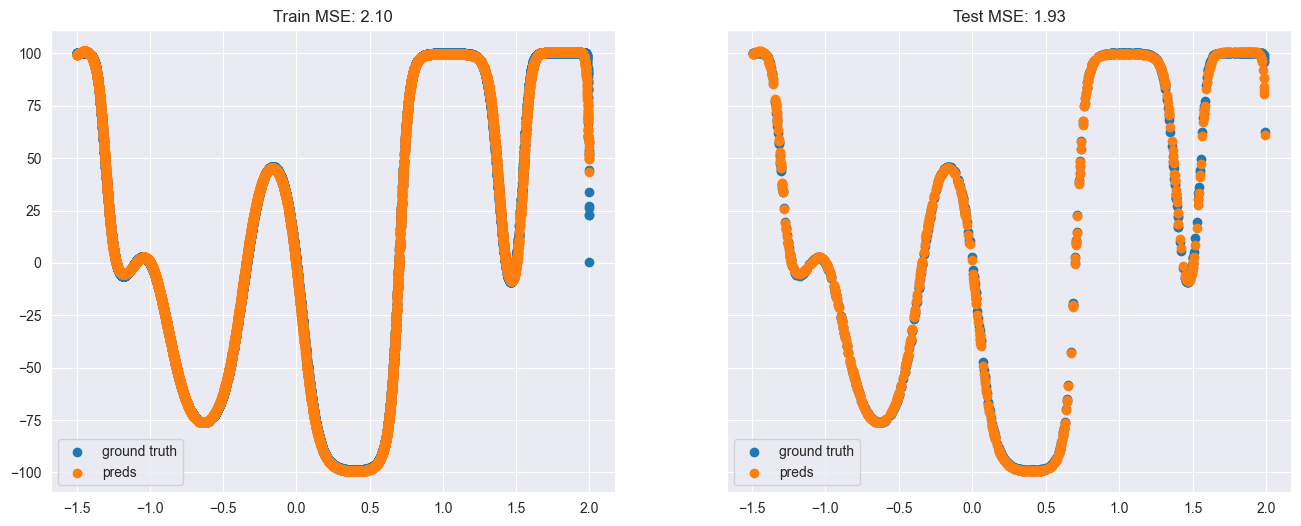

In [26]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [27]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 2.10
Test MSE: 1.93
----------


#### 3 hidden layers

In [59]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [60]:
optimizer = nn.optimizers.Adam(model.parameters, lr=1e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

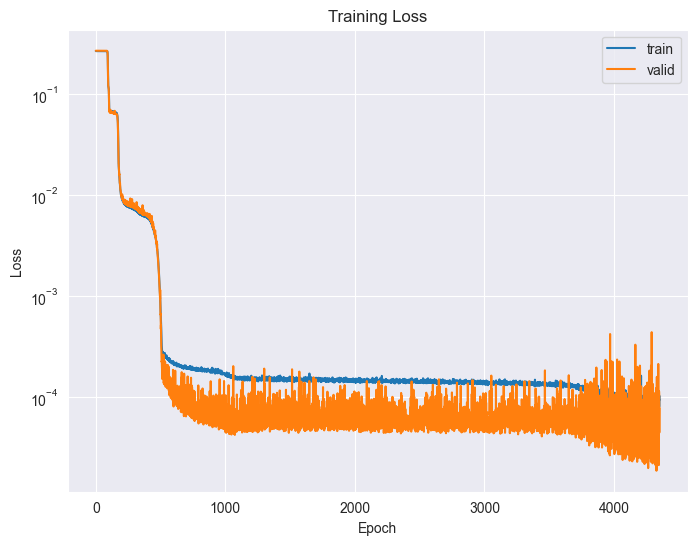

In [62]:
trainer.plot_training(ylog=True)

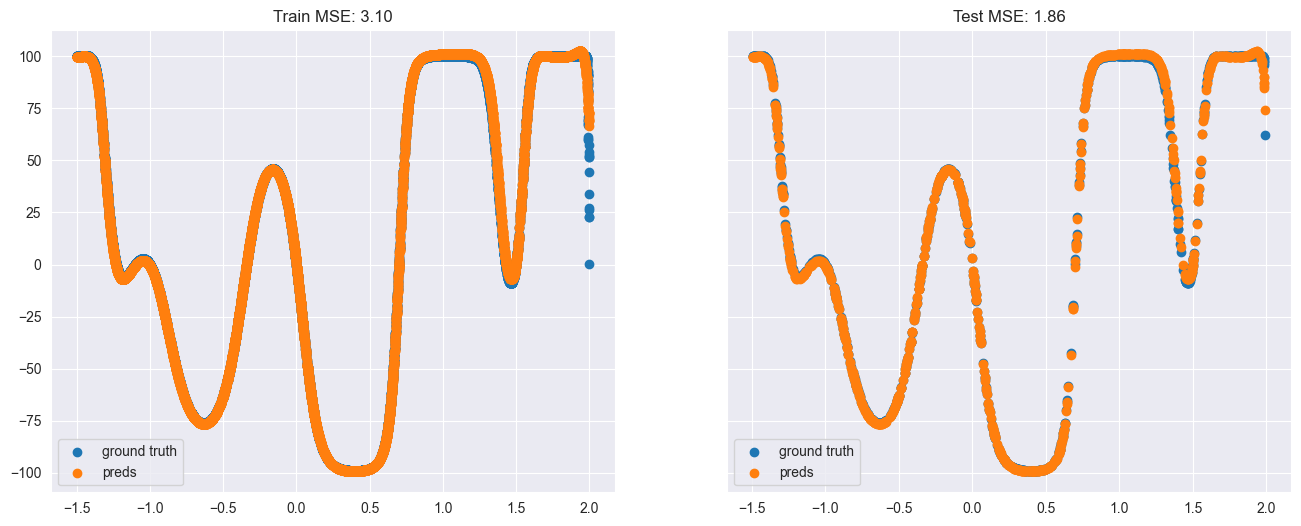

In [63]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [64]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 3.10
Test MSE: 1.86
----------


### ReLU

#### 1 hidden layer

In [118]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [119]:
optimizer = nn.optimizers.Adam(model.parameters, lr=5e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

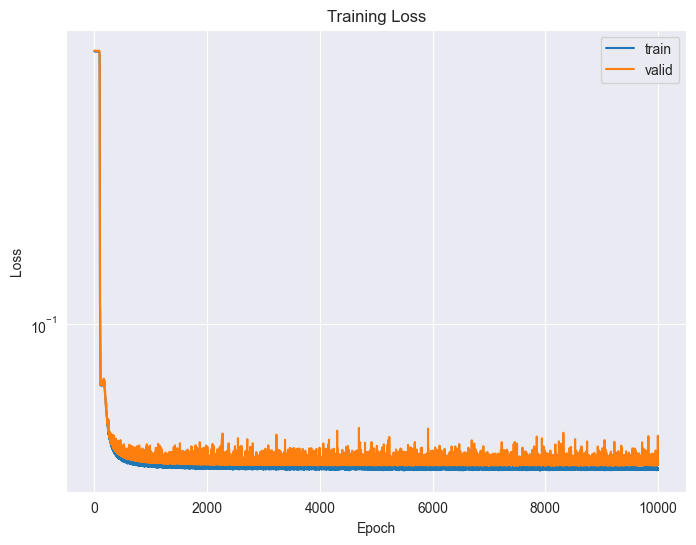

In [121]:
trainer.plot_training(ylog=True)

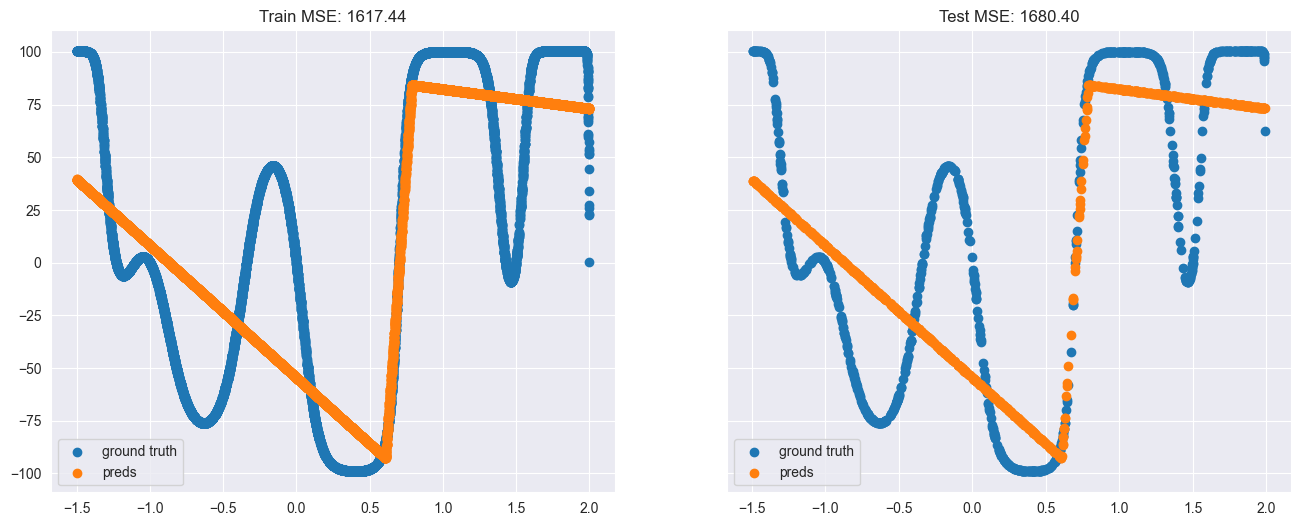

In [122]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [123]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 1617.44
Test MSE: 1680.40
----------


#### 2 hidden layers

In [36]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [37]:
optimizer = nn.optimizers.Adam(model.parameters, lr=7e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

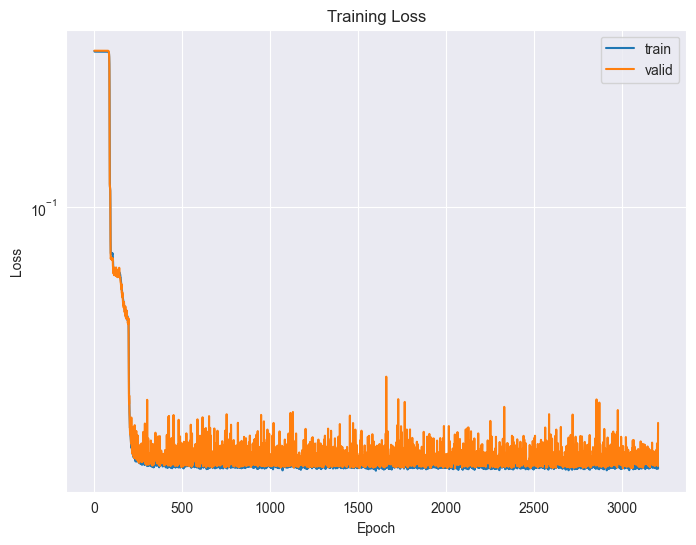

In [39]:
trainer.plot_training(ylog=True)

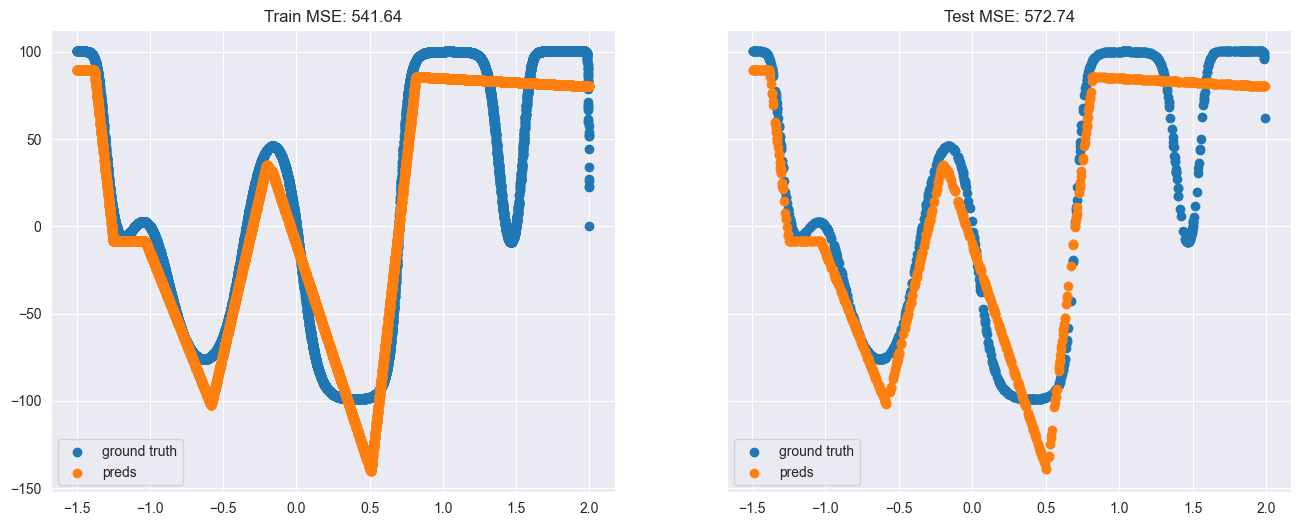

In [40]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [41]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 541.64
Test MSE: 572.74
----------


#### 3 hidden layers

In [65]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [66]:
optimizer = nn.optimizers.Adam(model.parameters, lr=5e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

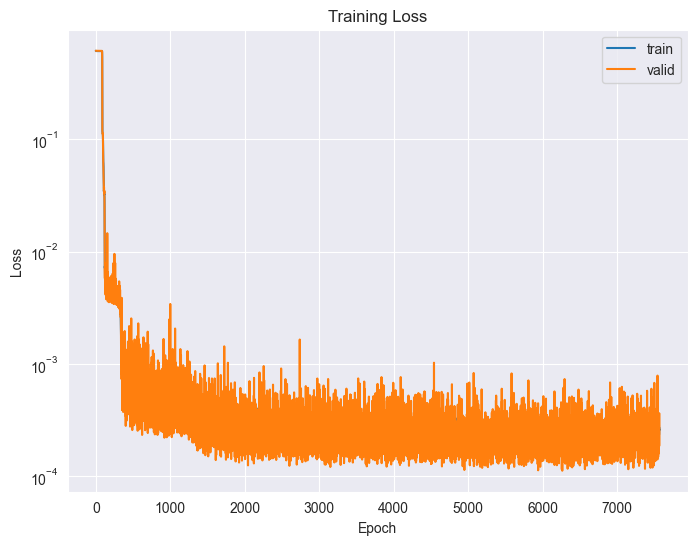

In [68]:
trainer.plot_training(ylog=True)

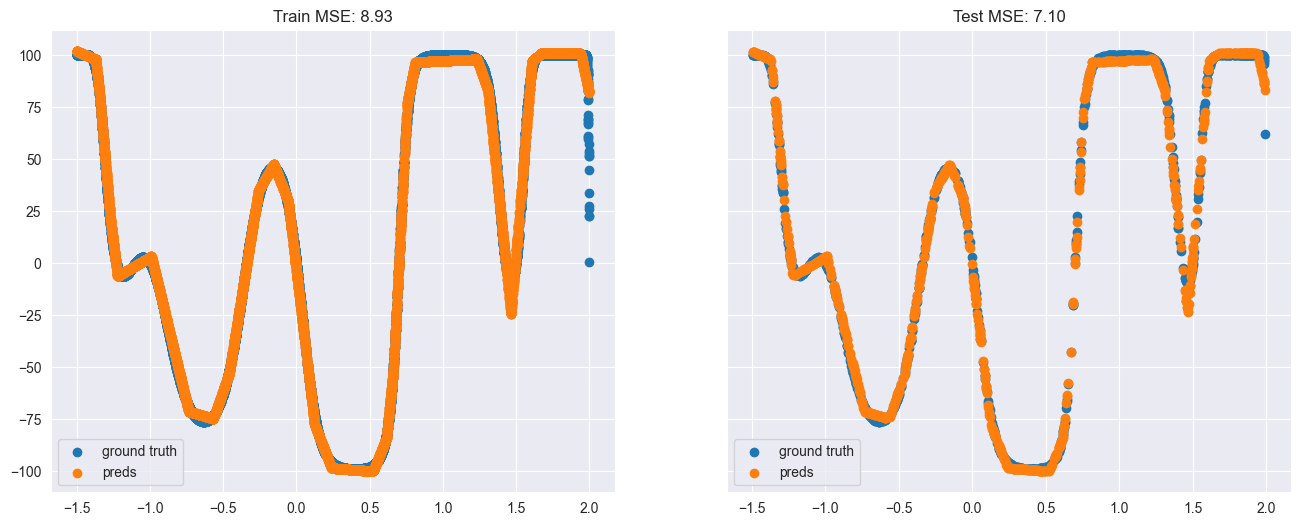

In [69]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [70]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 8.93
Test MSE: 7.10
----------


## steps-large

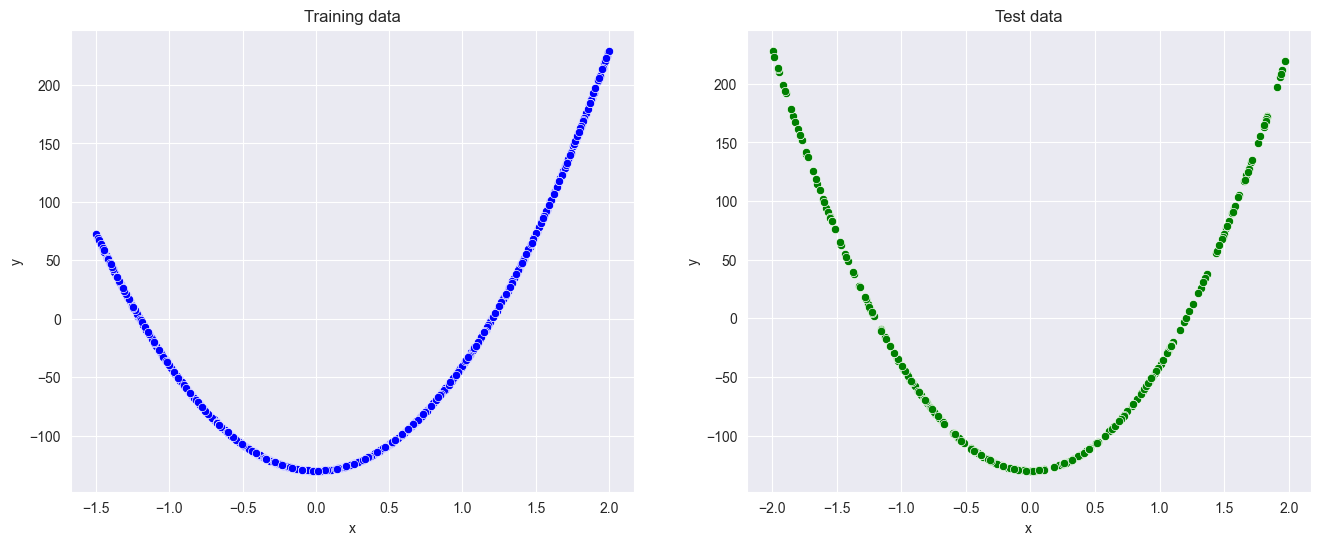

In [72]:
square_large = RegressionDataset('square-large')
square_large.plot_dataset()

In [74]:
square_large_train, square_large_test = square_large.to_df()

X_train, y_train = square_large_train['x'].values.reshape(-1, 1), square_large_train['y'].values.reshape(-1, 1)
X_test, y_test = square_large_test['x'].values.reshape(-1, 1), square_large_test['y'].values.reshape(-1, 1)


# let's scale the data for easier training
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [83]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [84]:
optimizer = nn.optimizers.Adam(model.parameters, lr=5e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=32, log_every=100)

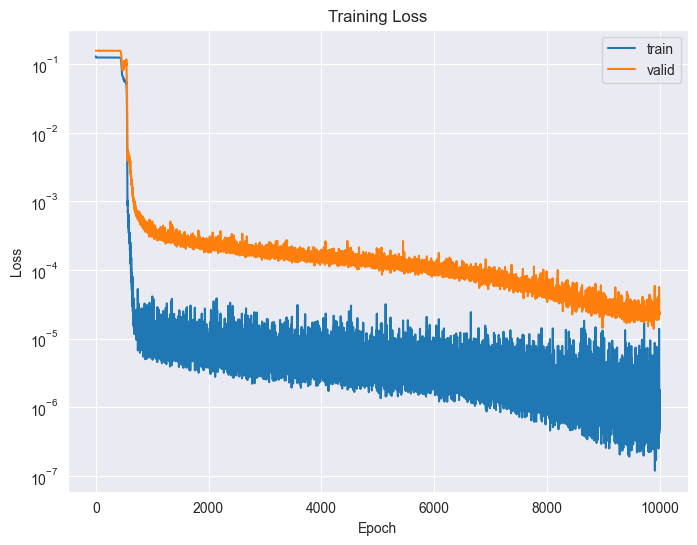

In [86]:
trainer.plot_training(ylog=True)

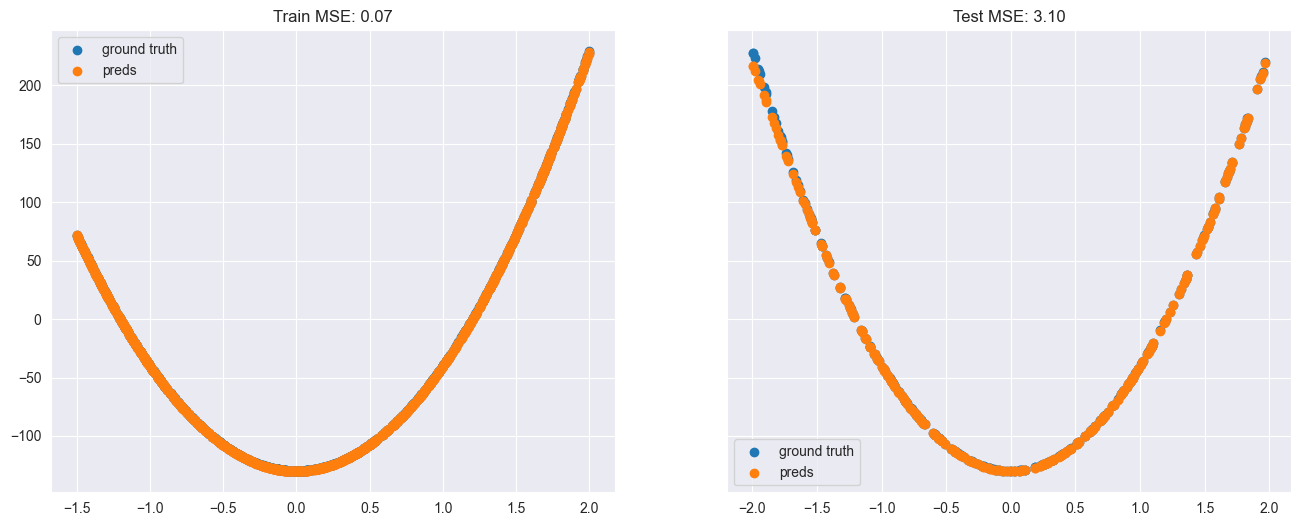

In [87]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [88]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 0.07
Test MSE: 3.10
----------


In [89]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [91]:
optimizer = nn.optimizers.Adam(model.parameters, lr=1e-3, )
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=32, log_every=100)

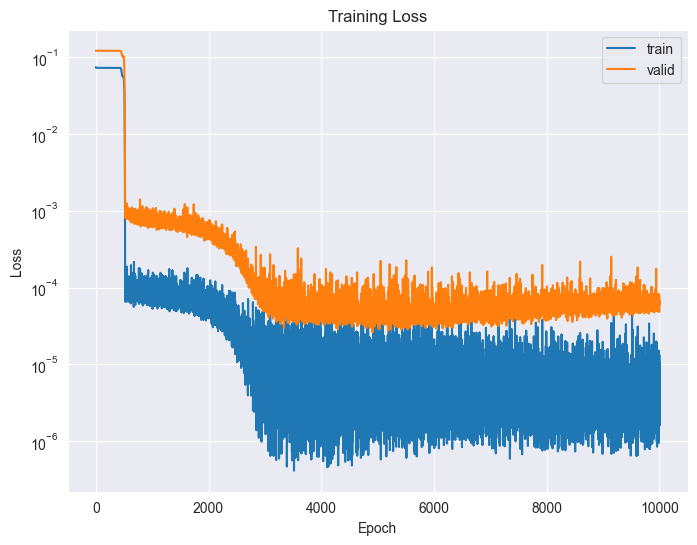

In [93]:
trainer.plot_training(ylog=True)

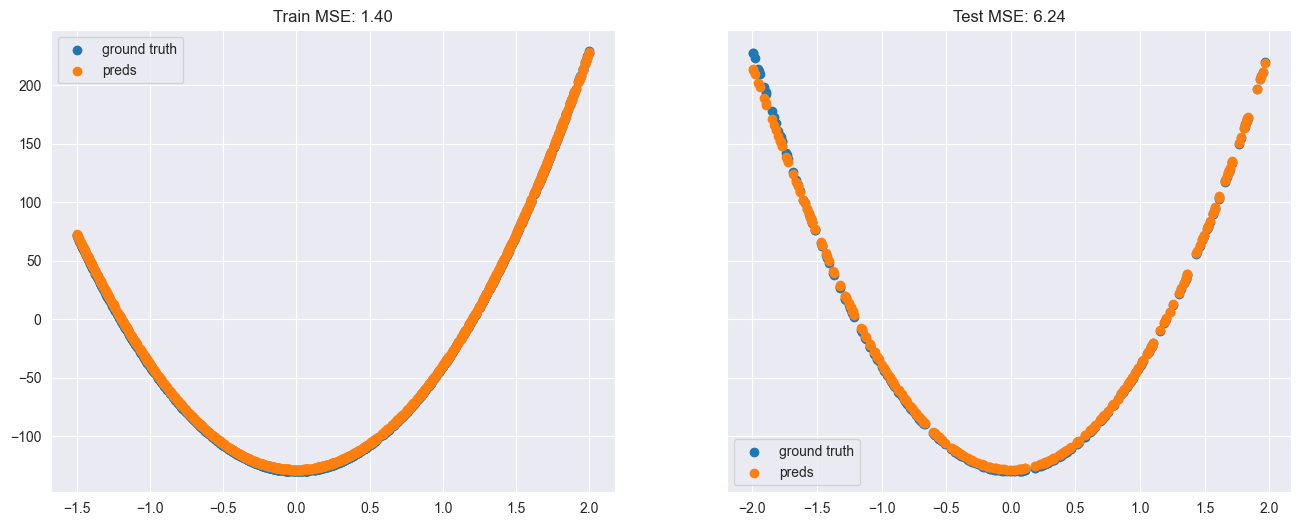

In [94]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

In [95]:
evaluate_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

Training MSE: 1.40
Test MSE: 6.24
----------


## rings3-regular

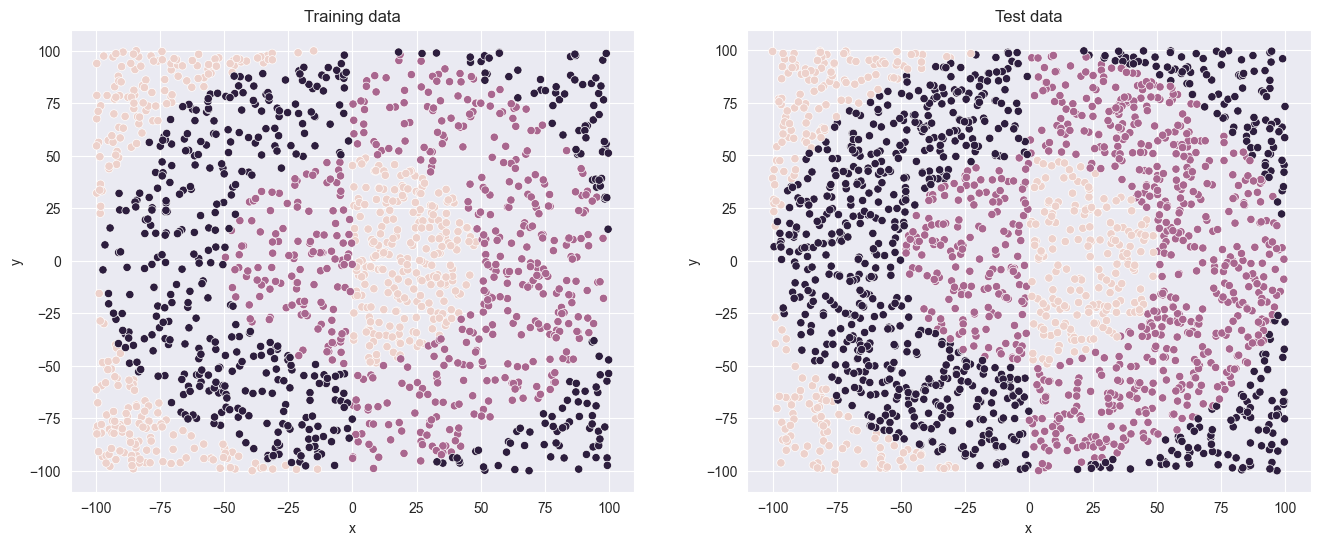

In [ ]:
rings3_regular = ClassificationDataset('rings3-regular')
rings3_regular.plot_dataset()

In [7]:
rings3_regular_train, rings3_regular_test = rings3_regular.to_df()

In [8]:
X_train, y_train = rings3_regular_train[['x', 'y']].values, rings3_regular_train['c'].values.reshape(-1, 1)
X_test, y_test = rings3_regular_test[['x', 'y']].values, rings3_regular_test['c'].values.reshape(-1, 1)

In [9]:
# let's scale the data for easier training
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.squeeze())
y_test_encoded = encoder.transform(y_test.squeeze())

In [10]:
model = nn.Sequential([
    nn.Linear(2, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 3),
])
model.init_weights('xavier_uniform')


In [11]:
optimizer = nn.optimizers.Adam(model.parameters, lr=0.001,)
criterion = nn.CrossEntropyLoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_encoded, X_valid=X_test_scaled, y_valid=y_test_encoded, num_epochs=10000, batch_size=16, log_every=100)

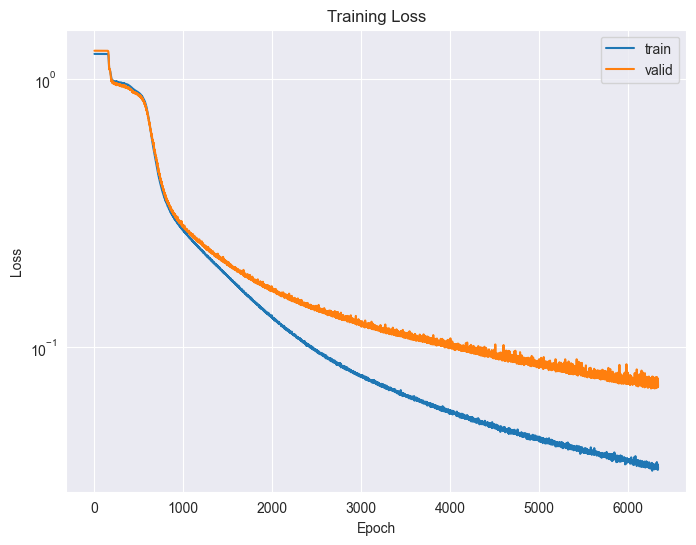

In [13]:
trainer.plot_training(ylog=True)

In [14]:
evaluate_classification(model, X_train_scaled, y_train, X_test_scaled, y_test)

Training accuracy: 0.99
Test accuracy: 0.97
----------
Training F1-score: 0.99
Test F1-score: 0.97


In [15]:
model = nn.Sequential([
    nn.Linear(2, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 3),
])
model.init_weights('xavier_uniform')


In [16]:
optimizer = nn.optimizers.Adam(model.parameters, lr=0.001,)
criterion = nn.CrossEntropyLoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_encoded, X_valid=X_test_scaled, y_valid=y_test_encoded, num_epochs=10000, batch_size=16, log_every=100)

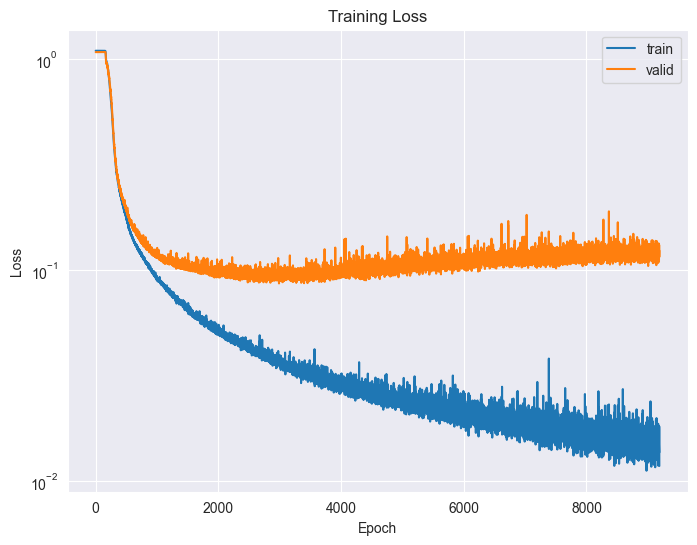

In [18]:
trainer.plot_training(ylog=True)

In [19]:
evaluate_classification(model, X_train_scaled, y_train, X_test_scaled, y_test)

Training accuracy: 1.00
Test accuracy: 0.97
----------
Training F1-score: 1.00
Test F1-score: 0.97


## rings5-regular

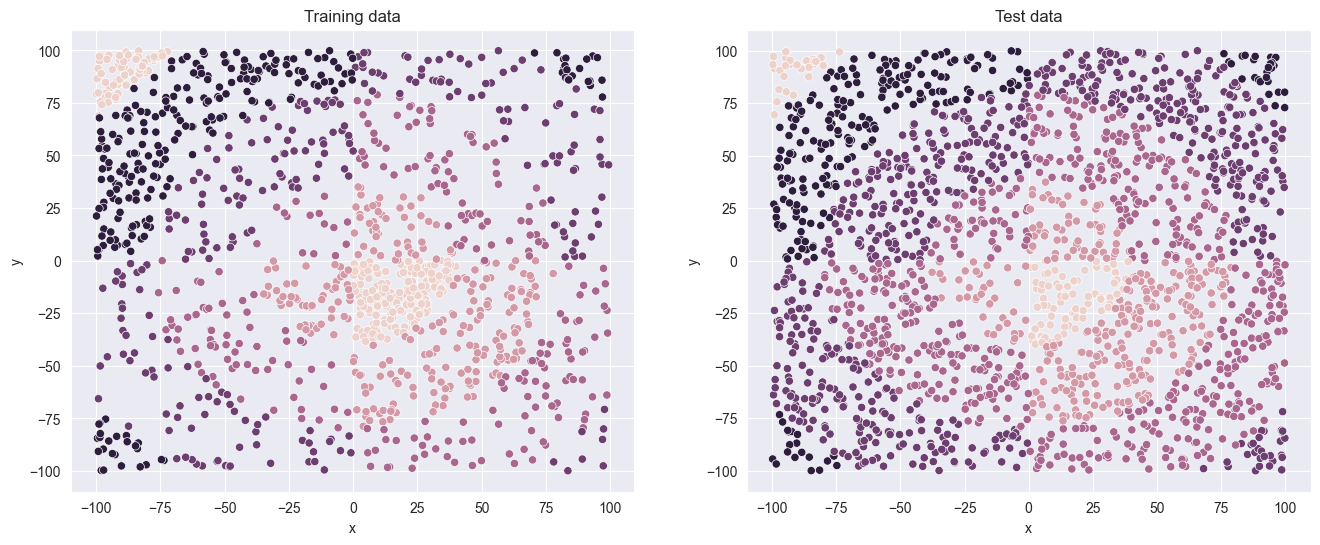

In [ ]:
rings5_regular = ClassificationDataset('rings5-regular')
rings5_regular.plot_dataset()

In [21]:
rings5_regular_train, rings5_regular_test = rings5_regular.to_df()

In [22]:
X_train, y_train = rings5_regular_train[['x', 'y']].values, rings5_regular_train['c'].values.reshape(-1, 1)
X_test, y_test = rings5_regular_test[['x', 'y']].values, rings5_regular_test['c'].values.reshape(-1, 1)

In [23]:
# let's scale the data for easier training
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.squeeze())
y_test_encoded = encoder.transform(y_test.squeeze())

In [27]:
model = nn.Sequential([
    nn.Linear(2, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 5),
])
model.init_weights('xavier_uniform')


In [28]:
optimizer = nn.optimizers.Adam(model.parameters, lr=0.001,)
criterion = nn.CrossEntropyLoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_encoded, X_valid=X_test_scaled, y_valid=y_test_encoded, num_epochs=10000, batch_size=16, log_every=100)

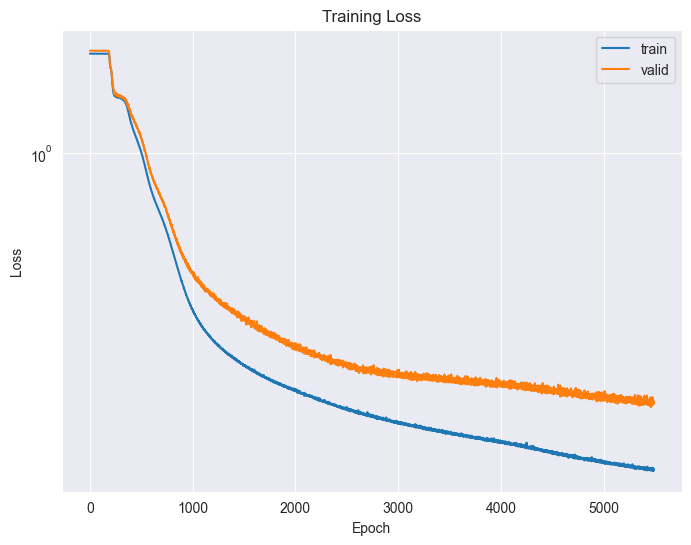

In [30]:
trainer.plot_training(ylog=True)

In [31]:
evaluate_classification(model, X_train_scaled, y_train, X_test_scaled, y_test)

Training accuracy: 0.93
Test accuracy: 0.89
----------
Training F1-score: 0.93
Test F1-score: 0.89


In [32]:
model = nn.Sequential([
    nn.Linear(2, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 5),
])
model.init_weights('xavier_uniform')


In [33]:
optimizer = nn.optimizers.Adam(model.parameters, lr=0.001,)
criterion = nn.CrossEntropyLoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_encoded, X_valid=X_test_scaled, y_valid=y_test_encoded, num_epochs=10000, batch_size=16, log_every=100)

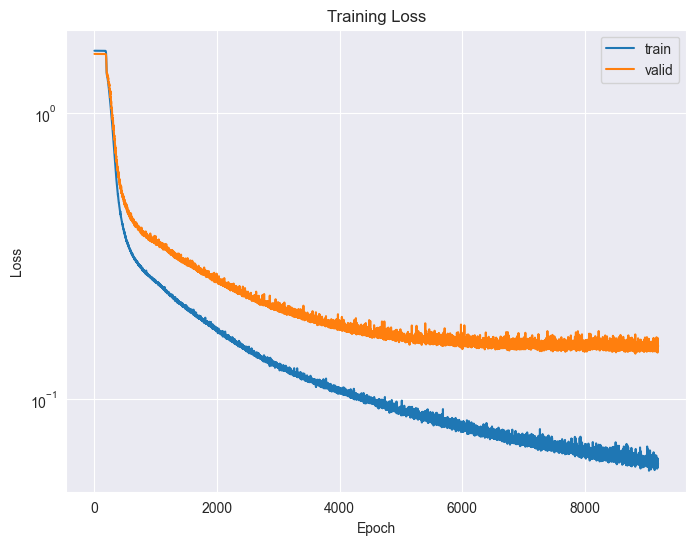

In [35]:
trainer.plot_training(ylog=True)

In [36]:
evaluate_classification(model, X_train_scaled, y_train, X_test_scaled, y_test)

Training accuracy: 0.99
Test accuracy: 0.94
----------
Training F1-score: 0.99
Test F1-score: 0.95
